# Introduction

Data is from [Kaggle.com](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)

# Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
import noisereduce as nr
import IPython
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
phase5_path = "/Users/miladshirani/Documents/Flatiron/phase_5"
base_path = "Emotional-Speech-Recognition"
toronto_data = "Toronto-Data"

data_path = os.path.join(phase5_path,base_path, toronto_data)
file_path = os.listdir(data_path)
print(file_path)


['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']


In [4]:
file_0 = file_path[0]
file_0_path = os.path.join(data_path, file_0)
os.listdir(file_0_path)[0]

'YAF_date_disgust.wav'

In [6]:
files = {}
for i in file_path:
    file_i = os.path.join(data_path, i)
    files[i] = os.listdir(file_i)

In [7]:
files.keys()

dict_keys(['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad'])

In [8]:
df = pd.DataFrame(list(zip(files.keys(), files.values())),
                  columns = ["data-name", "name"])

df = df.explode("name").reset_index(drop = True)

df["path"] = df.apply(lambda x: os.path.join(data_path, 
                                                  x["data-name"], 
                                                  x["name"]), 
                                                  axis = 1)

df["target"] = df["data-name"].apply(lambda x: x[4:].lower())
df.drop("data-name", inplace = True, axis = 1)

df["target"] = df["target"].apply(lambda x: "surprise" 
                                  if x == "pleasant_surprise"
                                 or x == "pleasant_surprised"
                                 else x)

In [9]:
df.target.value_counts(normalize = True)

disgust     0.142857
surprise    0.142857
happy       0.142857
sad         0.142857
neutral     0.142857
fear        0.142857
angry       0.142857
Name: target, dtype: float64

# Some Basic Visualizations

In the next figure, we plot both audio files with and without noise. 

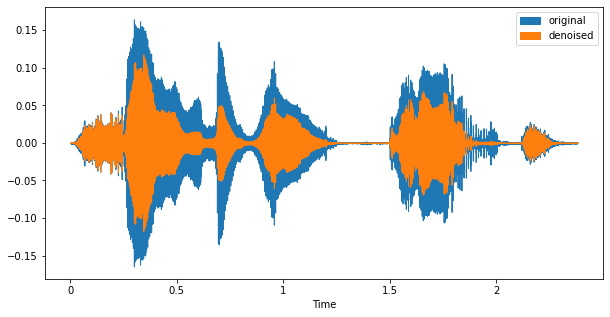

In [117]:
example_id = 0
audio_path = df["path"].iloc[example_id]
audio_target = df["target"].iloc[example_id]

x, sr = librosa.load(audio_path)
x_reduced = nr.reduce_noise(y=x, sr=sr)

plt.figure(figsize=(10, 5))
librosa.display.waveshow(x, sr=sr, label = "original")
librosa.display.waveshow(x_reduced, sr=sr, label = "denoised")
plt.legend();


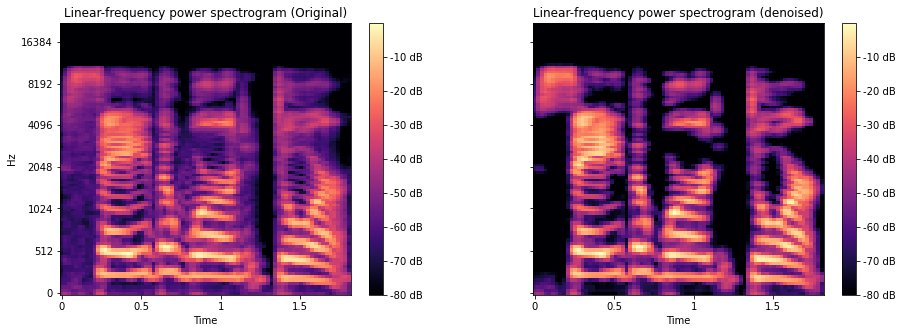

In [108]:
figs, axes = plt.subplots(ncols = 2, figsize = (15, 5))
figs.subplots_adjust(hspace=0.4, wspace=0.3)

hl = 512 # number of samples per time-step in spectrogram
hi = 100 # Height of image
wi = 384 # Width of image
fmax = sr

S = librosa.feature.melspectrogram(y=x, sr=sr, 
                                   n_mels=hi, fmax=fmax,
                                   n_fft=2048, hop_length=hl)

S_reduced = librosa.feature.melspectrogram(y=x_reduced, sr=sr, 
                                           n_mels=hi, fmax=fmax,
                                           n_fft=2048, hop_length=hl)

S_dB = librosa.power_to_db(S, ref=np.max)
S_reduced_dB = librosa.power_to_db(S_reduced, ref=np.max)



librosa.display.specshow(S_dB, x_axis='time', 
                         y_axis='mel', sr=sr, 
                         fmax=fmax, ax = axes[0])
axes[0].set(title='Linear-frequency power spectrogram (Original)')
axes[0].label_outer()
figs.colorbar(img, ax=axes[0], format="%+2.f dB");

librosa.display.specshow(S_reduced_dB, x_axis='time', 
                         y_axis='mel', sr=sr, 
                         fmax=fmax, ax = axes[1])
axes[1].set(title='Linear-frequency power spectrogram (denoised)')
axes[1].label_outer()
figs.colorbar(img, ax=axes[1], format="%+2.f dB");


# Effects of emotion in saying a word `door`

In [80]:
door = df[["name", "target", "path"]].copy()
door["door"] = pd.DataFrame(door["name"].apply(lambda x: "YAF_door" in x).astype(float))

emotion_door = door.loc[door["door"] == 1.0][["target", "path"]]
emotion_door.reset_index(inplace = True, drop = True)
# emotion_door

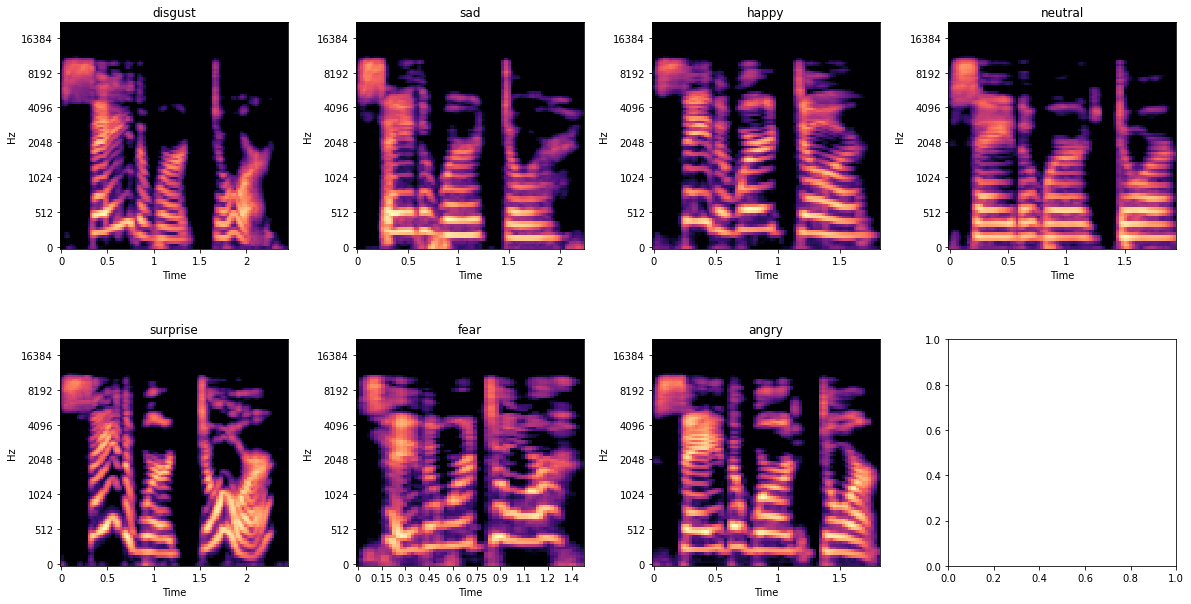

In [77]:
figs, axes = plt.subplots(nrows = 2 , ncols = 4, figsize = (20, 10))
figs.subplots_adjust(hspace=0.4, wspace=0.3)

for i in range(0, len(emotion_door)):
 
    ax = axes[i//4][i%4]
    audio_path = emotion_door.iloc[i]["path"]
    emotion = emotion_door.iloc[i]["target"]
    x, sr = librosa.load(audio_path)
    x_reduced = nr.reduce_noise(y=x, sr=sr)
    
    S_reduced = librosa.feature.melspectrogram(y=x_reduced,
                                               sr=sr, 
                                               n_mels=hi, 
                                               fmax=fmax,
                                               n_fft=2048,
                                               hop_length=hl)


    S_reduced_dB = librosa.power_to_db(S_reduced, ref=np.max)
    img_reduced = librosa.display.specshow(S_reduced_dB, 
                                           x_axis='time', 
                                           y_axis='mel', 
                                           sr=sr, 
                                           fmax=fmax,
                                           ax = ax)
    ax.set_title(emotion)    

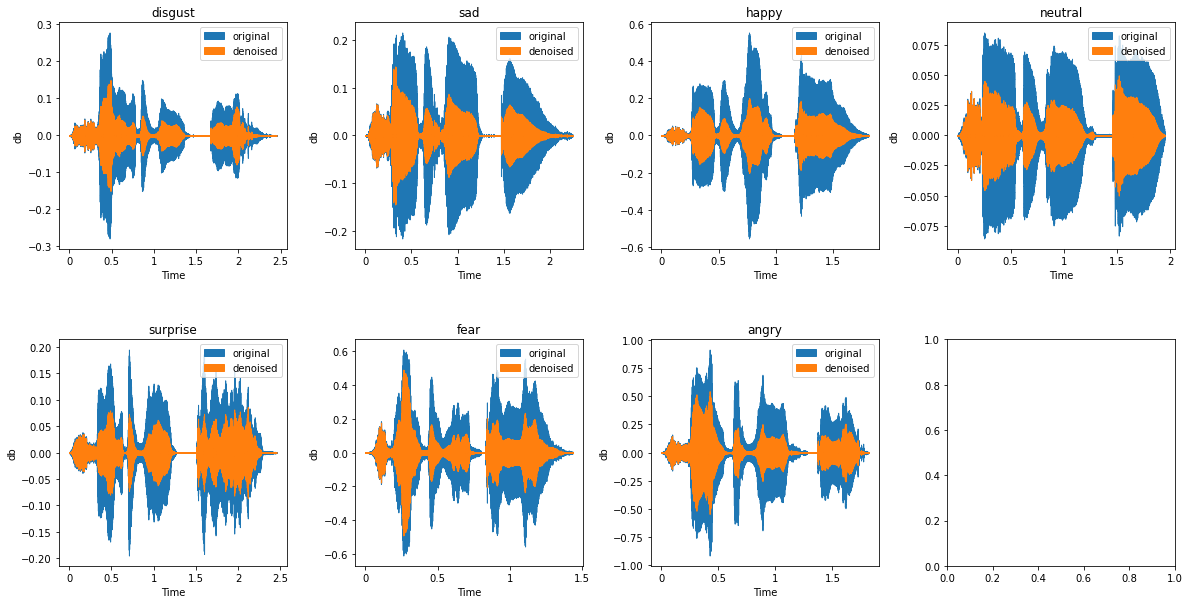

In [90]:
figs, axes = plt.subplots(nrows = 2 , ncols = 4, figsize = (20, 10))
figs.subplots_adjust(hspace=0.4, wspace=0.3)

for i in range(0, len(emotion_door)):  
    
    ax = axes[i//4][i%4]
    
    audio_path = emotion_door.iloc[i]["path"]
    emotion = emotion_door.iloc[i]["target"]
    x, sr = librosa.load(audio_path)
    x_reduced = nr.reduce_noise(y=x, sr=sr)
    librosa.display.waveshow(x, sr=sr, ax = ax, label = "original")
    librosa.display.waveshow(x_reduced, sr=sr, ax = ax, label = "denoised")
    ax.set_ylabel("db")
    ax.legend();
    ax.set_title(emotion)    

# Audio to Vectors

In [199]:
df["audio-length"] = df["path"].apply(lambda x: len(librosa.load(x)[0]))
df["sample-rate"] = df["path"].apply(lambda x: librosa.load(x)[1])

In [200]:
df.head()

,name,path,target,audio-length,sample-rate
0,YAF_date_disgust.wav,/Users/miladshirani/Documents/Flatiron/phase_5...,disgust,52496,22050
1,YAF_rag_disgust.wav,/Users/miladshirani/Documents/Flatiron/phase_5...,disgust,51195,22050
2,YAF_raise_disgust.wav,/Users/miladshirani/Documents/Flatiron/phase_5...,disgust,58346,22050
3,YAF_ditch_disgust.wav,/Users/miladshirani/Documents/Flatiron/phase_5...,disgust,56061,22050
4,YAF_door_disgust.wav,/Users/miladshirani/Documents/Flatiron/phase_5...,disgust,53996,22050


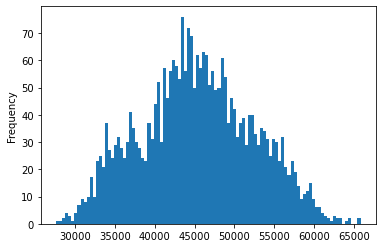

In [206]:
df["audio-length"].plot(kind = "hist", bins = 100);

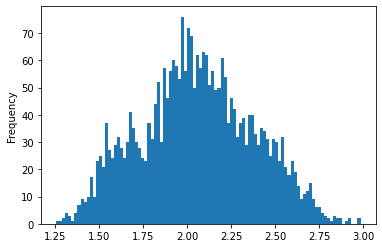

In [213]:
df["time"] = df["audio-length"] / df["sample-rate"]
df["time"].plot(kind = "hist", bins = 100);

In [216]:
df = df.sample(frac = 1)
df.to_csv("df.csv")

# Train-Test-Split

In [232]:
y = df["target"]
X = df[["path", "name"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                   test_size = 0.2, 
                                                   random_state=42,
                                                   shuffle = True)

train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

train.to_csv("../Train-Test-Split/train.csv")
test.to_csv("../Train-Test-Split/test.csv")

In [233]:
train.head()

,path,name,target
2595,/Users/miladshirani/Documents/Flatiron/phase_5...,YAF_walk_angry.wav,angry
389,/Users/miladshirani/Documents/Flatiron/phase_5...,OAF_sail_ps.wav,surprise
2063,/Users/miladshirani/Documents/Flatiron/phase_5...,OAF_pick_neutral.wav,neutral
2094,/Users/miladshirani/Documents/Flatiron/phase_5...,OAF_rat_neutral.wav,neutral
1479,/Users/miladshirani/Documents/Flatiron/phase_5...,OAF_came_angry.wav,angry


In [245]:
aa = train[train["target"] == "angry"]

In [247]:
aa["path"].iloc[0]

'/Users/miladshirani/Documents/Flatiron/phase_5/Emotional Speech Recognition/Toronto-Data/YAF_angry/YAF_walk_angry.wav'

# Mel Spectrogram

In [267]:
def mel_spectrogram(target, data, path, sr = 22050):
    
    hl = 512 
    hi = 100 
    wi = 384 
    fmax = sr
    
    phase5_path = "/Users/miladshirani/Documents/Flatiron/phase_5/Emotional Speech Recognition"
    mel_spectrogram = "mel_spectrogram"

    target_path = os.path.join(phase5_path,
                               mel_spectrogram, 
                               path, target)
    
    data_set = data[data["target"] == target]
    
    for i in tqdm(range(len(data_set))):
        
        audio_path = data_set["path"].iloc[i]
        audio_name = data_set["name"].iloc[i][:-4]
        
        x, _ = librosa.load(audio_path)
        x_reduced = nr.reduce_noise(y=x, sr=sr)
        
        S = librosa.feature.melspectrogram(y=x_reduced, sr=sr, n_mels=hi, 
                                           fmax=fmax, hop_length=hl)
        
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        img = librosa.display.specshow(S_dB, 
                                       x_axis='mel', 
                                       y_axis='time', 
                                       sr=sr, 
                                       fmax=fmax)
        
        
        mel_name = audio_name + ".png"
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        a = plt.gca()
        # set visibility of x-axis as False
        xax = a.axes.get_xaxis()
        xax = xax.set_visible(False)
  
        # set visibility of y-axis as False
        yax = a.axes.get_yaxis()
        yax = yax.set_visible(False)
        
        plt.ioff()
        plt.savefig(fname = os.path.join(target_path, mel_name),
                   dpi = 400,
                   bbox_inches = "tight",
                   pad_inches = 0)
        
        
        plt.close()
        
        
    print("DONE!") 

In [268]:
targets = list(train["target"].unique())

In [269]:
for item in targets:
    print(f"{item}\n")
    mel_spectrogram(target = item, data = train, path = "train", sr = 22050)
    

  0%|          | 0/320 [00:00<?, ?it/s]

angry



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
surprise



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
neutral



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
fear



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
disgust



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
sad



  0%|          | 0/320 [00:00<?, ?it/s]

DONE!
happy



100%|██████████| 320/320 [01:52<00:00,  2.83it/s]

DONE!


In [270]:
for item in targets:
    print(f"{item}\n")
    mel_spectrogram(target = item, data = test, path = "test", sr = 22050)
    

  0%|          | 0/80 [00:00<?, ?it/s]

angry



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
surprise



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
neutral



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
fear



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
disgust



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
sad



  0%|          | 0/80 [00:00<?, ?it/s]

DONE!
happy



100%|██████████| 80/80 [00:29<00:00,  2.73it/s]

DONE!


In [272]:
targets = list(train["target"].unique())
targets

['angry', 'surprise', 'neutral', 'fear', 'disgust', 'sad', 'happy']